In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [78]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

start="2022-01-01"

assets = ["BNP.PA","ACA.PA","AC.PA","ORA.PA","AI.PA","^IRX"]
data = yf.download(assets,start=start)

[*********************100%***********************]  6 of 6 completed


In [79]:
data.head()

Price           Close                                                     \
Ticker          AC.PA     ACA.PA       AI.PA     BNP.PA    ORA.PA   ^IRX   
Date                                                                       
2022-01-03  27.799088   9.838484  121.023193  49.939327  7.713045  0.053   
2022-01-04  28.900417  10.071741  123.357491  51.612133  7.767063  0.080   
2022-01-05  28.928900  10.172149  125.362793  51.677410  7.734324  0.085   
2022-01-06  28.985865  10.289549  122.981491  52.379173  7.719593  0.090   
2022-01-07  29.061819  10.393047  122.542839  52.632130  7.717137  0.088   

Price            High                                    ...        Open  \
Ticker          AC.PA     ACA.PA       AI.PA     BNP.PA  ...       AI.PA   
Date                                                     ...               
2022-01-03  27.988971   9.894095  122.448834  50.175969  ...  120.788198   
2022-01-04  29.204232  10.152068  123.451497  52.011975  ...  121.665514   
2022-01-05  29.194739  10.297273  125.362793  52.444448  ...  123.169486   
2022-01-06  29.384622  10.297273  125.018140  52.493413  ...  124.078145   
2022-01-07  29.280186  10.440934  123.623815  52.648447  ...  122.370503   

Price                                      Volume                       \
Ticker         BNP.PA    ORA.PA   ^IRX      AC.PA     ACA.PA     AI.PA   
Date                                                                     
2022-01-03  49.865887  7.719593  0.050   524091.0  4846202.0  580193.0   
2022-01-04  50.331010  7.743328  0.085  1422637.0  6062208.0  905098.0   
2022-01-05  51.824288  7.782612  0.080   653053.0  6300320.0  973648.0   
2022-01-06  51.391808  7.734324  0.083   809845.0  7442277.0  946683.0   
2022-01-07  52.224129  7.721230  0.090   506225.0  8210181.0  841561.0   

Price                                   
Ticker         BNP.PA      ORA.PA ^IRX  
Date                                    
2022-01-03  2177649.0   6450743.0  0.0  
2022-01-04  3614427.0   8585931.0  0.0  
2022-01-05  3910434.0   9980707.0  0.0  
2022-01-06  3645405.0  10120682.0  0.0  
2022-01-07  3446590.0   6559974.0  0.0  

[5 rows x 30 columns]

In [80]:
# calcul des rendements (actuel - précedent / précédent)
returns = data["Close"].pct_change().dropna()
returns

Ticker,AC.PA,ACA.PA,AI.PA,BNP.PA,ORA.PA,^IRX
Date,,,,,,
2022-01-04,0.039617,0.023709,0.019288,0.033497,0.007003,0.509434
2022-01-05,0.000986,0.009969,0.016256,0.001265,-0.004215,0.062500
2022-01-06,0.001969,0.011541,-0.018995,0.013580,-0.001905,0.058824
2022-01-07,0.002620,0.010059,-0.003567,0.004829,-0.000318,-0.022222
2022-01-10,0.004900,0.005351,-0.002301,-0.007752,0.021211,0.022727
...,...,...,...,...,...,...
2024-12-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.003572
2024-12-27,0.005376,0.024400,0.010108,0.017379,0.008840,-0.008778
2024-12-30,-0.001070,0.006049,-0.008210,0.003246,0.004590,0.000957


In [81]:
  ## assets_stats function
# Objectives functions : at the top of the https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html page
#The method used to estimate the expected returns hist historical estimates.
method_mu  = "hist"

#The method used to estimate the covariance matrix , historical estimates.
method_cov  = "hist"


 ## Optimization function
#The model used for optimize the portfolio 'Classic', 'BL', 'FM' or 'BLFM'
model ="Classic" 

#The risk measure used to optimize the portfolio.Standard Deviation.
risk_measure = "MV"

#Objective function of the optimization model. 'MinRisk', 'Utility', 'Sharpe' or 'MaxRet'
obj='Sharpe'

#Risk free rate,Risk aversion factor, kind of return
rf=0 
l=0
hist=True


## Optimize

In [82]:
port = rp.Portfolio(returns=returns)

#Calculate the inputs that will be used by the optimization method
port.assets_stats(method_mu,method_cov)

#This method that calculates the optimal portfolio according to the optimization model
weight = port.optimization(model=model,rm=risk_measure,obj=obj,rf=rf,l=l,hist=hist)

## Plotting

             weights
AC.PA   1.584710e-01
ACA.PA  4.271781e-08
AI.PA   1.367358e-01
BNP.PA  2.702056e-09
ORA.PA  2.606895e-01
^IRX    4.441037e-01


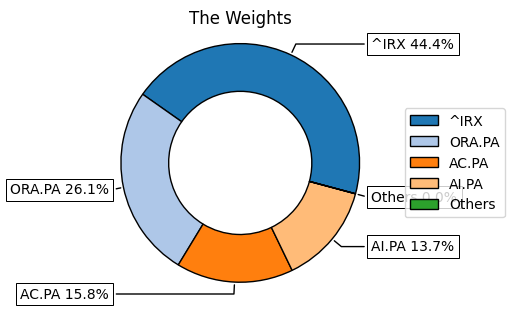

In [83]:
print(weight)
ax = rp.plot_pie(w = weight,title="The Weights",height=3,width =5)
# the weights represent the optimal portfolio to have

ACA.PA (Crédit Agricole) : Reçoit un poids de 1.0, ce qui signifie que tout le capital doit être investi dans cet actif.  
BNP.PA (BNP Paribas) : Reçoit un poids extrêmement faible (5.98 × 10⁻¹⁰, pratiquement 0).

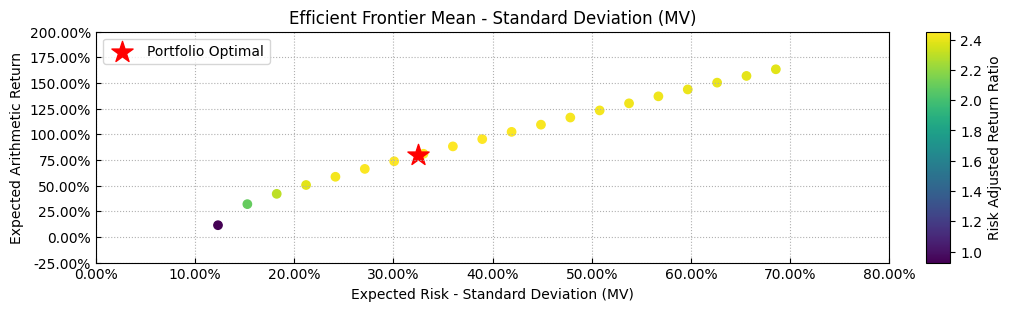

In [84]:
# the frontier map represent the retutn depending of the risk over 20 simulations
frontier = port.efficient_frontier(model = model,rm=risk_measure,rf = rf,hist=hist )
ax = rp.plot_frontier(w_frontier=frontier,returns=returns,mu=port.mu,cov=port.cov,rm=risk_measure,rf = rf, cmap='viridis',w=weight,height=3,width =10,label="Portfolio Optimal")



In [85]:
# the composition of the portefolio for each point. The optimal portefolio ( the star) is approximativelly the 3rd point
frontier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AC.PA,3.496669e-02,7.500632e-02,9.476762e-02,1.116086e-01,1.272842e-01,1.395365e-01,1.501879e-01,1.606136e-01,1.709576e-01,0.181783,1.910406e-01,2.010208e-01,2.109554e-01,2.208698e-01,2.274991e-01,1.856961e-01,1.384038e-01,9.175873e-02,4.564815e-02,1.568849e-10
ACA.PA,6.995033e-02,4.121909e-02,2.684591e-02,1.472950e-02,3.502710e-03,1.430260e-05,1.584510e-06,2.697569e-06,7.848571e-07,0.000005,2.785597e-06,2.687216e-06,4.731491e-06,3.450363e-06,3.859574e-06,1.437462e-06,1.365132e-06,1.059906e-06,1.653300e-06,1.427189e-10
AI.PA,2.687939e-01,2.314618e-01,2.133777e-01,1.976797e-01,1.831127e-01,1.668403e-01,1.499540e-01,1.333958e-01,1.170729e-01,0.100877,8.496993e-02,6.909915e-02,5.330425e-02,3.761210e-02,5.804275e-03,2.834409e-06,1.851019e-06,1.235735e-06,1.815598e-06,1.345264e-10
BNP.PA,3.465667e-09,1.737424e-07,7.560020e-08,7.635925e-08,4.590100e-07,4.736646e-07,1.284828e-07,3.124182e-07,1.626330e-07,0.000001,4.466309e-07,4.328480e-07,8.246368e-07,6.510891e-07,7.941459e-07,4.254606e-07,5.117574e-07,4.486138e-07,7.212596e-07,1.415564e-10
ORA.PA,6.152589e-01,5.108590e-01,4.599049e-01,4.160133e-01,3.751986e-01,3.339307e-01,2.927897e-01,2.524877e-01,2.127249e-01,0.172902,1.346339e-01,9.597261e-02,5.752210e-02,1.919330e-02,1.112065e-05,1.724636e-06,1.283231e-06,8.791531e-07,1.283977e-06,1.317496e-10
^IRX,1.103018e-02,1.414536e-01,2.051038e-01,2.599688e-01,3.109013e-01,3.596777e-01,4.070667e-01,4.534998e-01,4.992436e-01,0.544432,5.893524e-01,6.339043e-01,6.782126e-01,7.223207e-01,7.666808e-01,8.142975e-01,8.615911e-01,9.082376e-01,9.543464e-01,1.000000e+00


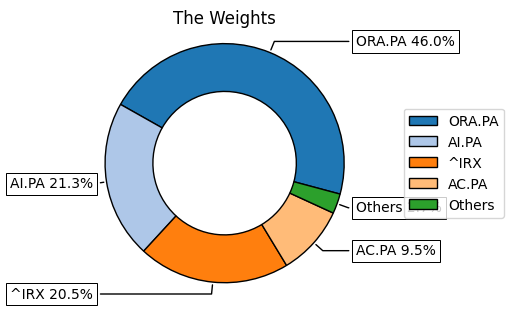

In [86]:
# study the composition of the 14th point 
ax = rp.plot_pie(w = frontier[2],title="The Weights",height=3,width =5)

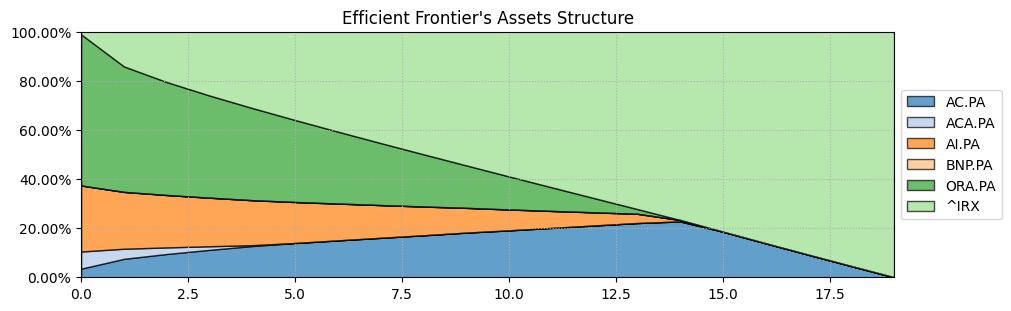

In [87]:
# ploting the best combinaison of assets for by risk/return level.
# exemple : for a hier risk but returns, we must invest all on ACA 
# in x we have the points above, in y the % of each asset

ax = rp.plot_frontier_area(frontier,height=3,width =10)

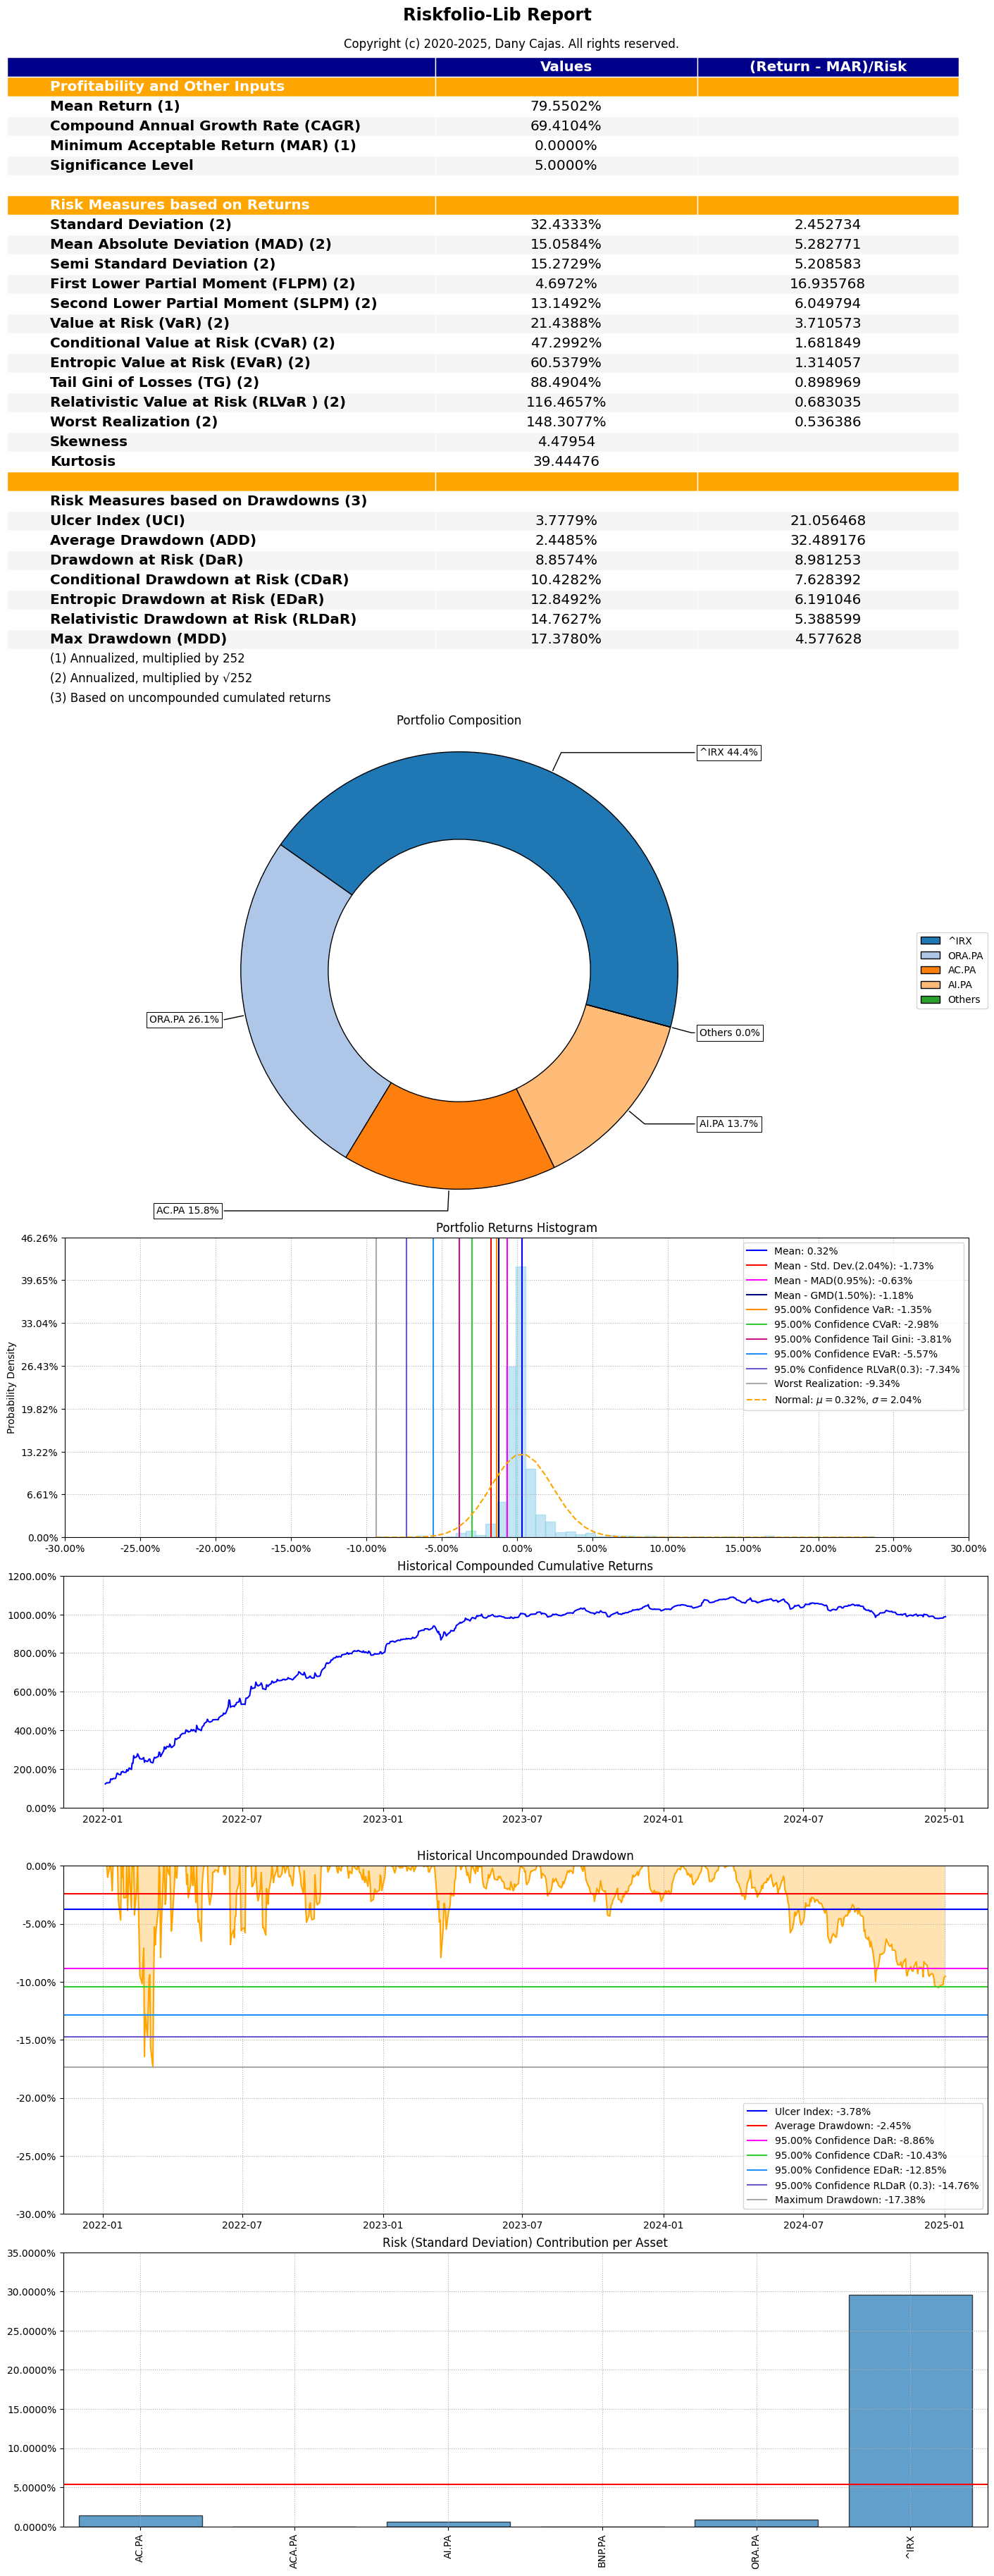

In [88]:
# a generated report
ax = rp.jupyter_report(returns,weight,rm=risk_measure)